# Sample

In [1]:
import pandas as pd
import seaborn as sns 
def read_wandb_csv(loc):
    df = pd.read_csv(loc)
    df.param_config_id = df.param_config_id.astype('str')
    return df

In [55]:
df = read_wandb_csv("16_base_modded_sweep.csv")
df

,Name,Runtime,Notes,State,Tags,beta1,beta2,catch_dropout,early_stopping_patience,evaluation_steps,...,train_p_max,train_p_var,train_st1_loss,train_st1_p_max,train_st2_loss,train_st2_p_max,accuracy_mm,eval_loss_mm,eval_p_max_mm,eval_p_var_mm
0,16_modded_base_sweep_01_modded/run_44,1572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.004575,0.995437,0.008518,0.992310,NaN,NaN,NaN,NaN
1,16_modded_base_sweep_01_modded/run_43,704,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.011043,0.989027,0.016709,0.983639,NaN,NaN,NaN,NaN
2,16_modded_base_sweep_01_modded/run_42,867,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.021117,0.988630,0.025776,0.985621,NaN,NaN,NaN,NaN
3,16_modded_base_sweep_01_modded/run_41,877,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.002476,0.997528,0.004003,0.996044,NaN,NaN,NaN,NaN
4,16_modded_base_sweep_01_modded/run_40,503,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.006797,0.993228,0.009856,0.990252,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16_modded_base_sweep_00_modded/run_04,451,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001729,0.998273,0.002485,0.997519,NaN,NaN,NaN,NaN
101,16_modded_base_sweep_00_modded/run_03,572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001064,0.998936,0.001985,0.998059,NaN,NaN,NaN,NaN
102,16_modded_base_sweep_00_modded/run_02,325,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000561,0.999439,0.000852,0.999149,NaN,NaN,NaN,NaN
103,16_modded_base_sweep_00_modded/run_01,394,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000802,0.999199,0.001087,0.998913,NaN,NaN,NaN,NaN


<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

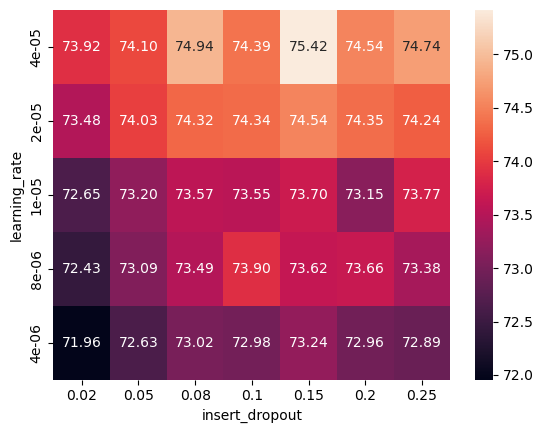

In [73]:
import seaborn as sns 
df_pivot = df.pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

# B_1 All runs combined

Relevant Run Generations:
Dataset Seed 1:
- 18_S0-3 (fertig)
- 16_S0-1
- 19_S0-1

Dataset Seed 2:
- 18_S4-5 (fertig)

In [2]:
df_64 = read_wandb_csv("B_0064_sweeps_400QNLI.csv")
df_256 = read_wandb_csv("B_0256_sweeps_100QNLI.csv")
df_1024 = read_wandb_csv("B_1024_sweeps_25QNLI.csv")

df_all = pd.concat([df_64,df_256,df_1024], axis=0, ignore_index=True)

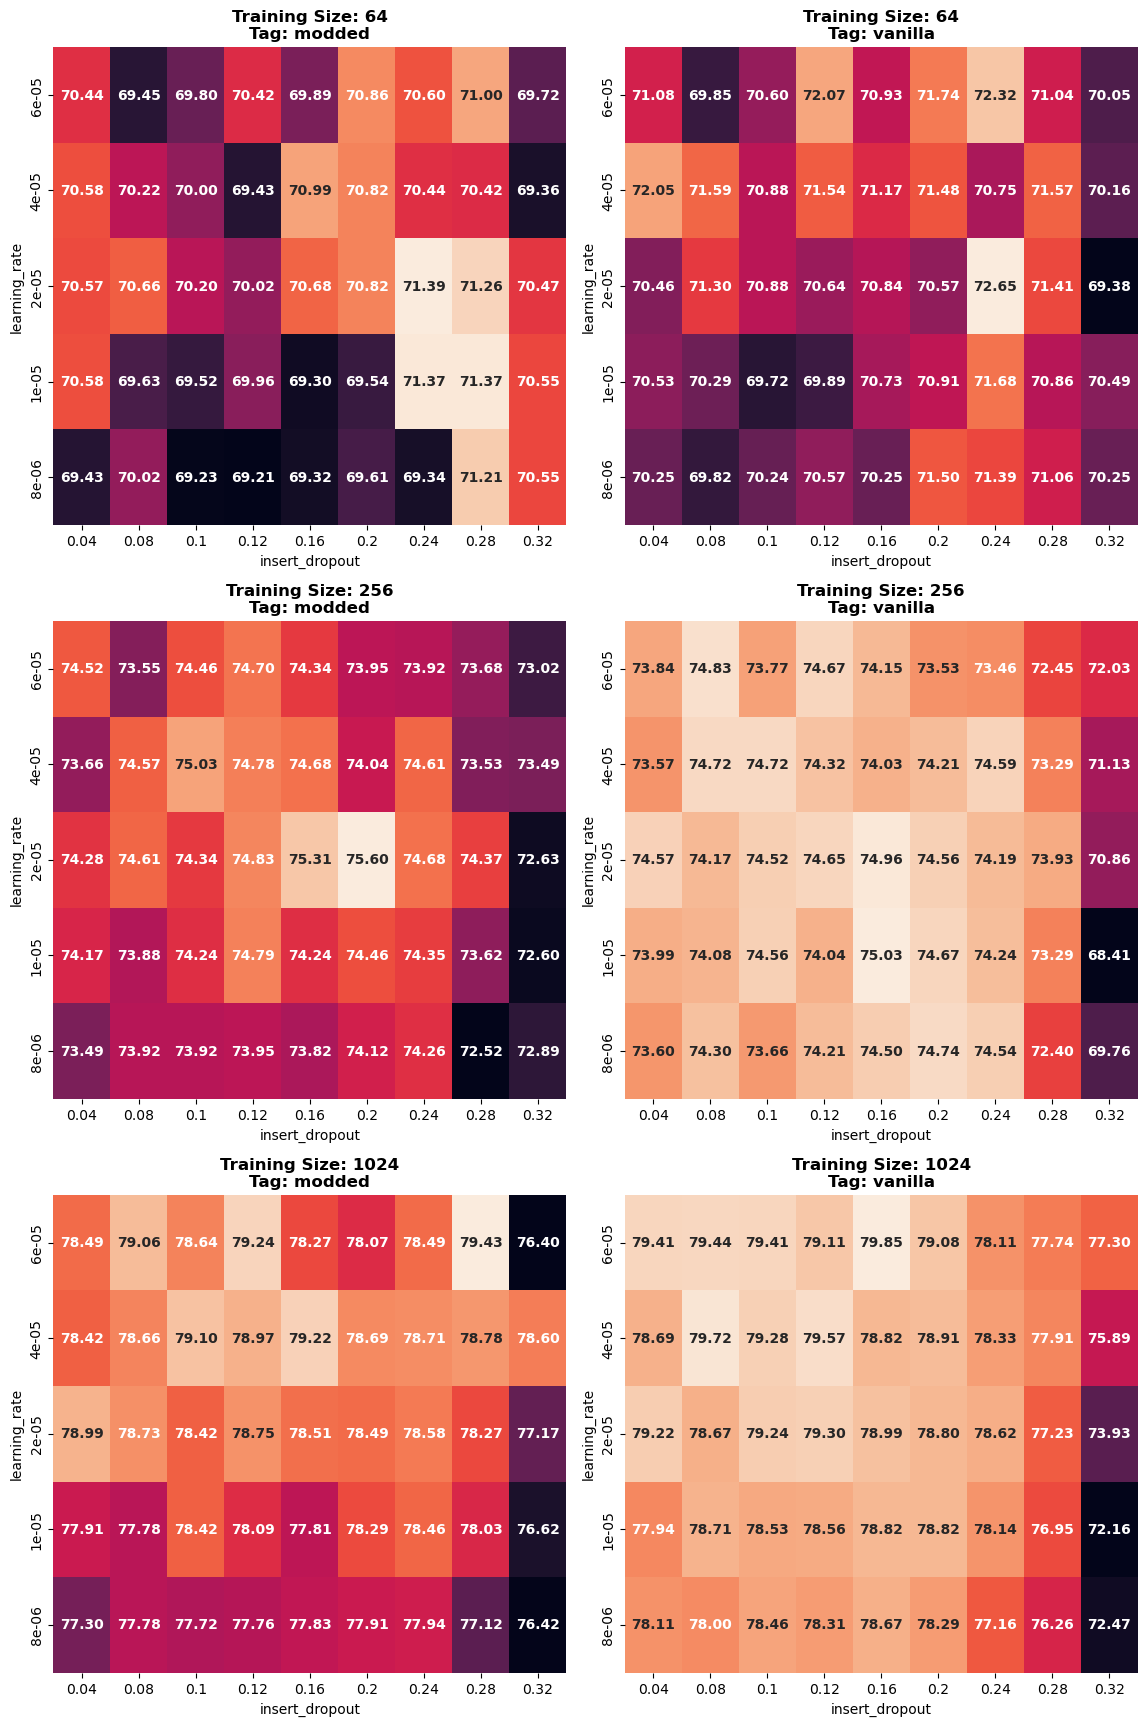

In [7]:
import matplotlib.pyplot as plt
import numpy as np
training_sizes = [64,256,1024]
tags = ["modded","vanilla"]
TEXTWIDTH = 5.78853
SCALER = 2
AGG_FUNCTION = 'median'
ratio = len(training_sizes) / len(tags)
fig, axs = plt.subplots(
    len(training_sizes),
    len(tags),
    # sharex = True,
    # sharey = True,
    # figsize = (14,14)
    figsize = (SCALER*TEXTWIDTH,ratio*SCALER*TEXTWIDTH),
    # gridspec_kw={'width_ratios':[1]*len(tags) + [0.08]}
    )

external_filter = df_all["dataset_seed"] == 1
for idx, train_size in enumerate(training_sizes):
    train_size_filter = df_all["training_size"] == train_size
    pivots_dict = {}
    vmin = 100
    vmax = 0

    for idy, tag in enumerate(tags):
        mode_filter = df_all["Tags"].str.contains(tag)
        filters = external_filter & train_size_filter & mode_filter
        filtered_df = df_all.loc[filters]
        df_pivot = filtered_df.pivot_table(
            index=["learning_rate"],
            columns=["insert_dropout"],
            values=["best_accuracy"],
            aggfunc=AGG_FUNCTION
            )
        df_pivot = df_pivot.sort_index(ascending=False)
        df_pivot.columns = df_pivot.columns.droplevel(0)
        df_pivot = df_pivot * 100 # make values percentage
        vmin = min(vmin,df_pivot.min().min())
        vmax = max(vmax,df_pivot.max().max())
        pivots_dict[idy] = df_pivot

    
    for idy, df_pivot in pivots_dict.items():
        ax = axs[idx,idy]
        sns.heatmap(
            data=df_pivot,
            annot=True,
            annot_kws={'weight':"bold"},
            fmt='.2f',
            ax = ax,
            # vmin=vmin,
            # vmax=vmax,
            cbar = False,#if idy != 0 else True,
            cbar_ax= axs[idx,-1]
            )   
        title = f'Training Size: {train_size}\nTag: {tags[idy]}'
        ax.set_title(title, weight='bold')
fig.tight_layout()
plt.savefig('B_heatmaps_lr_dropout.pdf', format='pdf')
        # if idy == 0:
        #     ax.set_ylabel(f'Training Size: {train_size}')
    
        # if idx == len(training_sizes) - 1:
        #     ax.set_xlabel(f'Tag: {tags[idy]}')

In [ ]:
filters = (df["catch_dropout"] == 0) and () 

# Apply filters
filtered_df = df.loc[filters]

# Create pivot table
df_pivot = filtered_df.pivot_table(index=["learning_rate"], columns=["insert_dropout"], values=["best_accuracy"], aggfunc='median')

# Sort and modify the pivot table
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100

# Plot the heatmap
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

# Samples size 64, 200 epochs

In [11]:
loc = "B_0064_sweeps_200various.csv"
df = read_wandb_csv(loc)
df

,Name,Runtime,Notes,State,Tags,ID,User,Group,Job Type,Created,...,eval_loss_mm,eval_p_max_mm,eval_p_var_mm,f1,matthews_correlation,pearson,spearmanr,train_loss,train_p_max,train_p_var
0,18_SWP8_ID_269_MOD,389,-,finished,"NEW_GRAD_INPUT, SWP8, modded",5okgfovc,ricu,NaN,NaN,2023-12-30T12:37:23.000Z,...,NaN,NaN,NaN,0.807211,NaN,NaN,NaN,NaN,NaN,NaN
1,18_SWP8_ID_268_MOD,366,-,finished,"NEW_GRAD_INPUT, SWP8, modded",ux982sk2,ricu,NaN,NaN,2023-12-30T12:31:04.000Z,...,NaN,NaN,NaN,0.792754,NaN,NaN,NaN,NaN,NaN,NaN
2,18_SWP8_ID_267_MOD,353,-,finished,"NEW_GRAD_INPUT, SWP8, modded",gl39xb9n,ricu,NaN,NaN,2023-12-30T12:24:58.000Z,...,NaN,NaN,NaN,0.798400,NaN,NaN,NaN,NaN,NaN,NaN
3,18_SWP8_ID_266_MOD,373,-,finished,"NEW_GRAD_INPUT, SWP8, modded",bijwvgbd,ricu,NaN,NaN,2023-12-30T12:18:32.000Z,...,NaN,NaN,NaN,0.806519,NaN,NaN,NaN,NaN,NaN,NaN
4,18_SWP8_ID_265_MOD,317,-,finished,"NEW_GRAD_INPUT, SWP8, modded",onzwnpeu,ricu,NaN,NaN,2023-12-30T12:13:01.000Z,...,NaN,NaN,NaN,0.797526,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18_SWP7_ID_191_VAN,100,-,finished,"SWP7, vanilla",infzhytv,ricu,NaN,NaN,2023-12-27T07:39:04.000Z,...,NaN,NaN,NaN,NaN,-0.011438,NaN,NaN,NaN,NaN,NaN
996,18_SWP7_ID_190_VAN,93,-,finished,"SWP7, vanilla",1qcgd487,ricu,NaN,NaN,2023-12-27T07:37:17.000Z,...,NaN,NaN,NaN,NaN,-0.004845,NaN,NaN,NaN,NaN,NaN
997,18_SWP7_ID_189_VAN,110,-,finished,"SWP7, vanilla",vekrvl3j,ricu,NaN,NaN,2023-12-27T07:35:13.000Z,...,NaN,NaN,NaN,NaN,0.038862,NaN,NaN,NaN,NaN,NaN
998,18_SWP8_ID_162_MOD,285,-,finished,"SWP8, modded",wgostra8,ricu,NaN,NaN,2023-12-27T07:34:46.000Z,...,NaN,NaN,NaN,0.739369,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
filter_a = df["dataset_seed"] == 2
filter_b = df["task_name"] == 'qnli'
filter = filter_a & filter_b
df.loc[filter,'Tags'].unique()

array([], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tags = ["modded","vanilla"]
TEXTWIDTH = 5.78853
SCALER = 2
AGG_FUNCTION = 'median'
ratio = len(training_sizes) / len(tags)
fig, axs = plt.subplots(
    len(training_sizes),
    len(tags),
    # sharex = True,
    # sharey = True,
    # figsize = (14,14)
    figsize = (ratio*SCALER*TEXTWIDTH,SCALER*TEXTWIDTH),
    # gridspec_kw={'width_ratios':[1]*len(tags) + [0.08]}
    )

external_filter = df_all["dataset_seed"] == 1
for idx, train_size in enumerate(training_sizes):
    train_size_filter = df_all["training_size"] == train_size
    pivots_dict = {}
    vmin = 100
    vmax = 0

    for idy, tag in enumerate(tags):
        mode_filter = df_all["Tags"].str.contains(tag)
        filters = external_filter & train_size_filter & mode_filter
        filtered_df = df_all.loc[filters]
        df_pivot = filtered_df.pivot_table(
            index=["learning_rate"],
            columns=["insert_dropout"],
            values=["best_accuracy"],
            aggfunc=AGG_FUNCTION
            )
        df_pivot = df_pivot.sort_index(ascending=False)
        df_pivot.columns = df_pivot.columns.droplevel(0)
        df_pivot = df_pivot * 100 # make values percentage
        vmin = min(vmin,df_pivot.min().min())
        vmax = max(vmax,df_pivot.max().max())
        pivots_dict[idy] = df_pivot

    
    for idy, df_pivot in pivots_dict.items():
        ax = axs[idx,idy]
        sns.heatmap(
            data=df_pivot,
            annot=True,
            fmt='.2f',
            ax = ax,
            vmin=vmin,
            vmax=vmax,
            cbar = False,#if idy != 0 else True,
            cbar_ax= axs[idx,-1]
            )   
        if idy == 0:
            ax.set_ylabel(f'Training Size: {train_size}')
    
        if idx == len(training_sizes) - 1:
            ax.set_xlabel(f'Tag: {tags[idy]}')

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

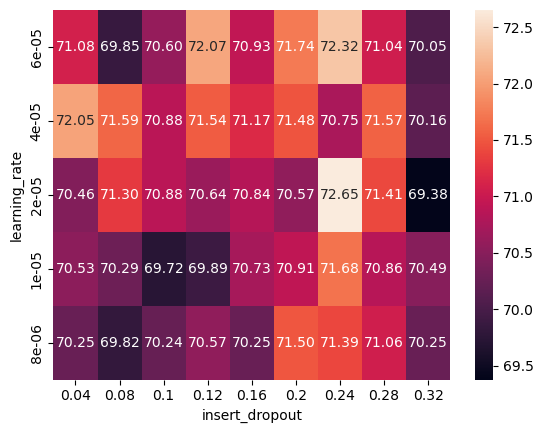

In [25]:
df = df_64
filter_a = df["dataset_seed"] == 1
filter_b = df["catch_dropout"] != 0
filter = filter_a & filter_b

df_pivot = df.loc[filter,].pivot_table(
    index=["learning_rate"],
    columns=["insert_dropout"],
    values=["best_accuracy"],
    aggfunc='median'
    )
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

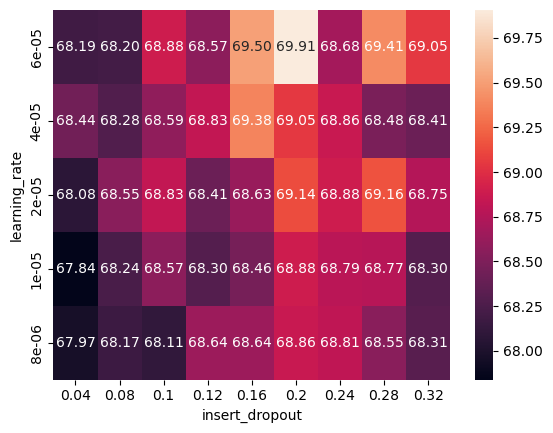

In [25]:
df_pivot = df.loc[df["catch_dropout"]!=0,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)

# All heatmap sweeps

In [43]:
dfs = [
    read_wandb_csv("B_0064_sweeps_400QNLI.csv"),
    read_wandb_csv("B_0256_sweeps_100QNLI.csv"),
    read_wandb_csv("B_1024_sweeps_25QNLI.csv"),
    read_wandb_csv("B_0064_sweeps_200QNLI.csv"),
    read_wandb_csv("B_0064_sweeps_200MRPC.csv"),
    read_wandb_csv("B_0064_sweeps_200COLA.csv")
]

df_all = pd.concat(dfs, axis=0, ignore_index=True)
df_all["cleaned_tags"] = df_all["Tags"].str.replace(r"SWP\d, ","",regex=True)
df_all.shape
df_all.head()

,Name,Runtime,Notes,State,Tags,ID,User,Group,Job Type,Created,...,spearmanr,train_loss,train_p_max,train_p_var,no_checkpointing,test_accuracy,vector_norms,test_accuracy_best_accuracy,test_accuracy_best_eval_loss,cleaned_tags
0,18_SWP5_ID_134_VAN,782,-,finished,"SWP5, vanilla",u3272tl6,ricu,NaN,NaN,2024-01-03T12:31:58.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vanilla
1,18_SWP5_ID_133_VAN,1652,-,finished,"SWP5, vanilla",hbm8kny9,ricu,NaN,NaN,2024-01-03T12:04:05.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vanilla
2,18_SWP5_ID_132_VAN,1086,-,finished,"SWP5, vanilla",hosc0890,ricu,NaN,NaN,2024-01-03T11:45:37.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vanilla
3,18_SWP5_ID_131_VAN,726,-,finished,"SWP5, vanilla",tfngl3qm,ricu,NaN,NaN,2024-01-03T11:33:10.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vanilla
4,18_SWP5_ID_130_VAN,1704,-,finished,"SWP5, vanilla",c0dvm3jw,ricu,NaN,NaN,2024-01-03T11:04:25.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vanilla


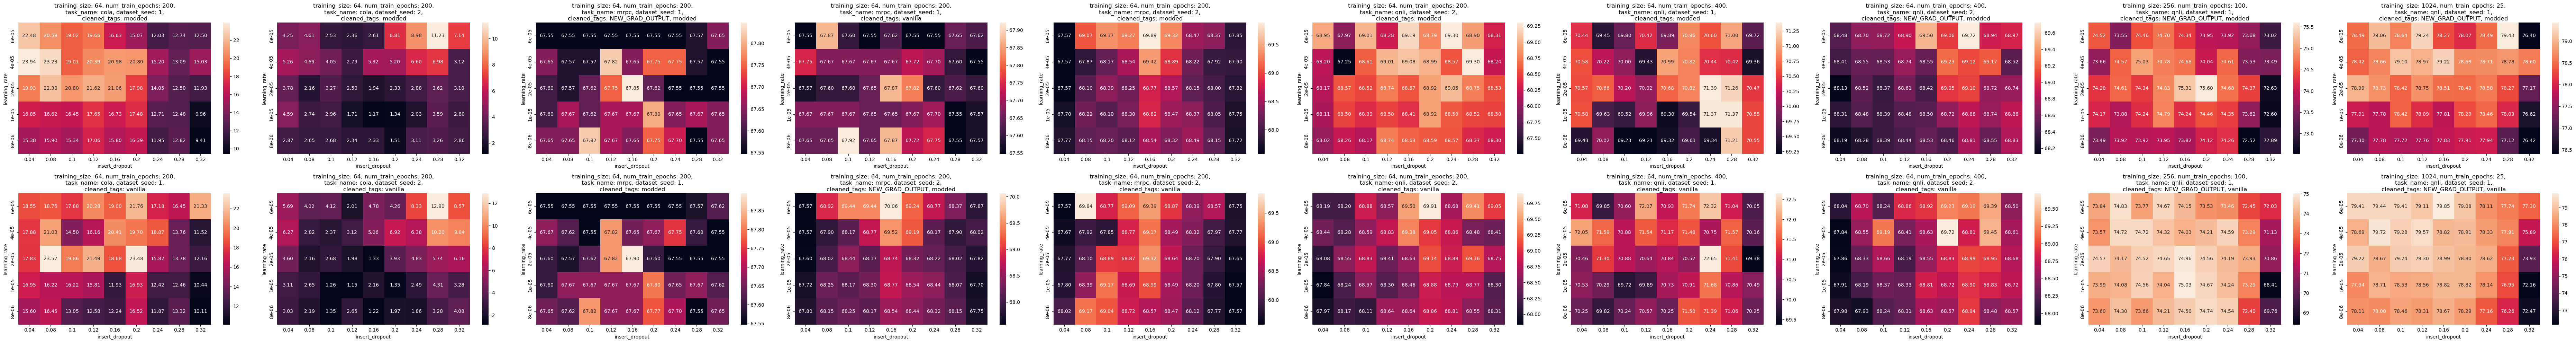

In [75]:
import matplotlib.pyplot as plt
import numpy as np
PER_HEATMAP_SIZE = 5
AGG_FUNCTION = 'median'
combinations = df_all.loc[:,[
    "training_size",
    "num_train_epochs",
    "task_name",
    "dataset_seed",
    "cleaned_tags"
    ]].value_counts().sort_index().index

n_combinations = len(combinations)
fig, axs = plt.subplots(
    2,
    int(n_combinations/2),
    figsize = (1.5*n_combinations/2*PER_HEATMAP_SIZE,2*PER_HEATMAP_SIZE),
    )
for index,combo in enumerate(combinations):
    selected_rows = (df_all[combinations.names] == combo).all(axis=1)
    
    filtered_df = df_all.loc[selected_rows]
    df_pivot = filtered_df.pivot_table(
        index=["learning_rate"],
        columns=["insert_dropout"],
        values=["best_matthews_correlation" if combo[2]=="cola" else "best_accuracy"],
        aggfunc=AGG_FUNCTION
        )
    df_pivot = df_pivot.sort_index(ascending=False)
    df_pivot.columns = df_pivot.columns.droplevel(0)
    df_pivot = df_pivot * 100 # make values percentage

    ax = axs[index%2,int(index/2)]
    sns.heatmap(
        data=df_pivot,
        annot=True,
        fmt='.2f',
        ax = ax,
    )   
    # title = ', '.join(f'{a}: {b}' for a, b in zip(combinations.names, combo))
    title_parts = ', '.join(f'{a}: {b}' for a, b in zip(combinations.names, combo)).split(', ')
    title = ',\n'.join(', '.join(title_parts[i:i+2]) for i in range(0, len(title_parts), 2))
    ax.set_title(title,wrap=True)
fig.tight_layout()
plt.savefig('B_various.pdf', format='pdf')

In [76]:
combinations

MultiIndex([(  64, 200, 'cola', 1,                   'modded'),
            (  64, 200, 'cola', 1,                  'vanilla'),
            (  64, 200, 'cola', 2,                   'modded'),
            (  64, 200, 'cola', 2,                  'vanilla'),
            (  64, 200, 'mrpc', 1,  'NEW_GRAD_OUTPUT, modded'),
            (  64, 200, 'mrpc', 1,                   'modded'),
            (  64, 200, 'mrpc', 1,                  'vanilla'),
            (  64, 200, 'mrpc', 2,  'NEW_GRAD_OUTPUT, modded'),
            (  64, 200, 'mrpc', 2,                   'modded'),
            (  64, 200, 'mrpc', 2,                  'vanilla'),
            (  64, 200, 'qnli', 2,                   'modded'),
            (  64, 200, 'qnli', 2,                  'vanilla'),
            (  64, 400, 'qnli', 1,                   'modded'),
            (  64, 400, 'qnli', 1,                  'vanilla'),
            (  64, 400, 'qnli', 2,  'NEW_GRAD_OUTPUT, modded'),
            (  64, 400, 'qnli', 2,      

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

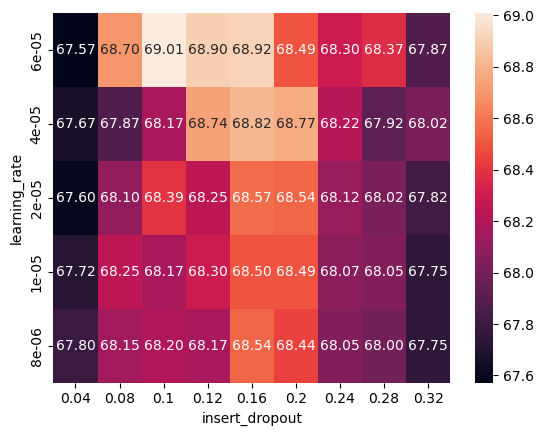

In [79]:
selected_rows = (df_all["training_size"]==64) & (df_all["cleaned_tags"].str.contains('modded'))
filtered_df = df_all.loc[selected_rows]
df_pivot = filtered_df.pivot_table(
    index=["learning_rate"],
    columns=["insert_dropout"],
    values=["best_accuracy"],
    aggfunc=AGG_FUNCTION
    )
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100 # make values percentage
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f',
    # ax = ax,
)  

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

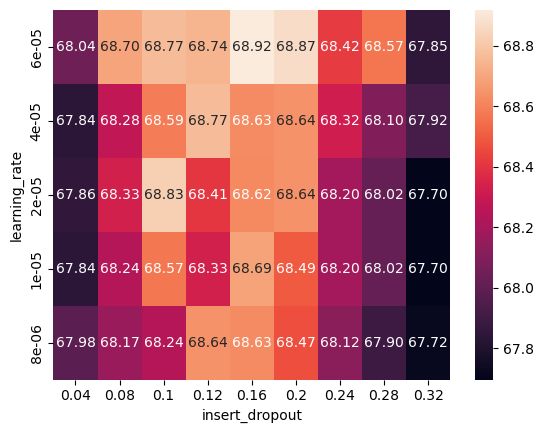

In [80]:
selected_rows = (df_all["training_size"]==64) & (df_all["cleaned_tags"].str.contains('vanilla'))
filtered_df = df_all.loc[selected_rows]
df_pivot = filtered_df.pivot_table(
    index=["learning_rate"],
    columns=["insert_dropout"],
    values=["best_accuracy"],
    aggfunc=AGG_FUNCTION
    )
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100 # make values percentage
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f',
    # ax = ax,
)  

# GEN20

In [3]:
df = read_wandb_csv("C_GEN20.csv")
df.head()

,Name,Runtime,Notes,Tags,State,ID,User,Group,Job Type,Created,...,train_st1_p_max,train_st2_loss,train_st2_p_max,vector_norms,test_accuracy_best_accuracy,test_accuracy_best_eval_loss,test_accuracy_best_f1,test_f1_best_accuracy,test_f1_best_eval_loss,test_f1_best_f1
0,20_S0_ID_36_MOD,1503,-,"SWP0, modded",finished,zdil9yma,ricu,NaN,NaN,2024-01-05T01:34:54.000Z,...,0.999895,0.000427,0.999582,"{""values"":[508,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.725586,0.670410,NaN,NaN,NaN,NaN
1,20_S0_ID_37_MOD,995,-,"SWP0, modded",finished,jvmjo9cb,ricu,NaN,NaN,2024-01-05T01:30:46.000Z,...,0.999883,0.000266,0.999734,"{""_type"":""histogram"",""bins"":[0.000005179531399...",0.737305,0.699707,NaN,NaN,NaN,NaN
2,20_S0_ID_39_MOD,1615,-,"SWP0, modded",finished,vrg1urle,ricu,NaN,NaN,2024-01-05T01:03:27.000Z,...,0.999948,0.009501,0.999729,"{""_type"":""histogram"",""bins"":[2.464086890086037...",0.738770,0.693359,NaN,NaN,NaN,NaN
3,20_S0_ID_35_MOD,2681,-,"SWP0, modded",finished,bkir5xqj,ricu,NaN,NaN,2024-01-05T00:49:51.000Z,...,0.999952,0.000085,0.999915,"{""bins"":[1.8312154281829862e-7,0.0000183290285...",0.719727,0.657715,NaN,NaN,NaN,NaN
4,20_S0_ID_38_MOD,1209,-,"SWP0, modded",finished,x7d3dhxp,ricu,NaN,NaN,2024-01-05T00:42:55.000Z,...,0.999917,0.000587,0.999435,"{""_type"":""histogram"",""bins"":[5.180692141948384...",0.731445,0.709473,NaN,NaN,NaN,NaN


In [5]:
df_pivot = df.pivot_table(
    index=["insert_dropout","Tags"],
    columns=["num_train_epochs"],
    values=["test_accuracy_best_accuracy"],
    aggfunc='median'
    )*100
# df_pivot = df_pivot.sort_columns(ascending=False)

# Calculate the average for each column
avg_column = df_pivot.mean()

# Create a DataFrame from the average column
avg_df = pd.DataFrame(avg_column).T
avg_df.index = pd.MultiIndex.from_tuples([('Average', '')], names=df_pivot.index.names)

# Add the average row to the dataframe
df_pivot = pd.concat([df_pivot, avg_df])

# Calculate the average for each row
avg_row = df_pivot.mean(axis=1)

# Add the average column to the dataframe
df_pivot['Average'] = avg_row
df_pivot

test_accuracy_best_accuracy             \
num_train_epochs                                      25        100   
insert_dropout Tags                                                   
0.1            SWP0, modded                    71.240234  72.314453   
               SWP1, vanilla                   71.240234  71.923828   
0.2            SWP0, modded                    71.582031  73.388672   
               SWP1, vanilla                   71.679688  72.070312   
Average                                        71.435547  72.424316   

                                                      Average  
num_train_epochs                    400        800             
insert_dropout Tags                                            
0.1            SWP0, modded   72.753906  72.265625  72.143555  
               SWP1, vanilla  72.656250  72.851562  72.167969  
0.2            SWP0, modded   72.851562  73.144531  72.741699  
               SWP1, vanilla  72.412109  72.607422  72.192383  
Average                       72.668457  72.717285  72.311401

In [6]:
df_pivot = df.pivot_table(
    index=["insert_dropout","Tags"],
    columns=["num_train_epochs"],
    values=["test_accuracy_best_eval_loss"],
    aggfunc='median'
    )*100
# df_pivot = df_pivot.sort_columns(ascending=False)

# Calculate the average for each column
avg_column = df_pivot.mean()

# Create a DataFrame from the average column
avg_df = pd.DataFrame(avg_column).T
avg_df.index = pd.MultiIndex.from_tuples([('Average', '')], names=df_pivot.index.names)

# Add the average row to the dataframe
df_pivot = pd.concat([df_pivot, avg_df])

# Calculate the average for each row
avg_row = df_pivot.mean(axis=1)

# Add the average column to the dataframe
df_pivot['Average'] = avg_row
df_pivot

test_accuracy_best_eval_loss             \
num_train_epochs                                       25        100   
insert_dropout Tags                                                    
0.1            SWP0, modded                     68.164062  68.750000   
               SWP1, vanilla                    67.822266  67.333984   
0.2            SWP0, modded                     68.554688  68.164062   
               SWP1, vanilla                    68.847656  67.675781   
Average                                         68.347168  67.980957   

                                                      Average  
num_train_epochs                    400        800             
insert_dropout Tags                                            
0.1            SWP0, modded   68.261719  69.433594  68.652344  
               SWP1, vanilla  68.652344  70.068359  68.469238  
0.2            SWP0, modded   68.457031  69.335938  68.627930  
               SWP1, vanilla  69.042969  68.798828  68.591309  
Average                       68.603516  69.409180  68.585205

# GEN18 MRPC (64, base ) SWEEP

In [3]:
df = read_wandb_csv("18_sweep_64_base_mrpc.csv")
df

,Name,Runtime,Notes,Tags,ID,State,User,Group,Job Type,Created,...,eval_loss_mm,eval_p_max_mm,eval_p_var_mm,f1,matthews_correlation,pearson,spearmanr,train_loss,train_p_max,train_p_var
0,18_SWP8_ID_125_MOD,241,-,"NEW_GRAD_OUTPUT, SWP8, modded",pp56skk0,finished,ricu,NaN,NaN,2023-12-29T20:42:08.000Z,...,NaN,NaN,NaN,0.810165,NaN,NaN,NaN,NaN,NaN,NaN
1,18_SWP8_ID_107_MOD,263,-,"NEW_GRAD_INPUT, SWP8, modded",ux5m2njf,running,ricu,NaN,NaN,2023-12-29T20:42:01.000Z,...,NaN,NaN,NaN,0.809783,NaN,NaN,NaN,NaN,NaN,NaN
2,18_SWP8_ID_124_MOD,191,-,"NEW_GRAD_OUTPUT, SWP8, modded",ss8t3x5k,finished,ricu,NaN,NaN,2023-12-29T20:38:42.000Z,...,NaN,NaN,NaN,0.750217,NaN,NaN,NaN,NaN,NaN,NaN
3,18_SWP8_ID_106_MOD,265,-,"NEW_GRAD_INPUT, SWP8, modded",8hs51u7n,finished,ricu,NaN,NaN,2023-12-29T20:37:23.000Z,...,NaN,NaN,NaN,0.760283,NaN,NaN,NaN,NaN,NaN,NaN
4,18_SWP8_ID_105_MOD,295,-,"NEW_GRAD_INPUT, SWP8, modded",u18giyc6,finished,ricu,NaN,NaN,2023-12-29T20:32:13.000Z,...,NaN,NaN,NaN,0.759549,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,18_SWP8_ID_004_MOD,236,-,"SWP8, modded",vkb5dtyy,finished,ricu,NaN,NaN,2023-12-26T17:37:34.000Z,...,NaN,NaN,NaN,0.724314,NaN,NaN,NaN,NaN,NaN,NaN
500,18_SWP8_ID_003_MOD,231,-,"SWP8, modded",s7n3gj4b,finished,ricu,NaN,NaN,2023-12-26T17:33:29.000Z,...,NaN,NaN,NaN,0.664524,NaN,NaN,NaN,NaN,NaN,NaN
501,18_SWP8_ID_002_MOD,236,-,"SWP8, modded",wqwwvw40,finished,ricu,NaN,NaN,2023-12-26T17:29:19.000Z,...,NaN,NaN,NaN,0.733036,NaN,NaN,NaN,NaN,NaN,NaN
502,18_SWP8_ID_001_MOD,224,-,"SWP8, modded",zbdtwdfp,finished,ricu,NaN,NaN,2023-12-26T17:25:21.000Z,...,NaN,NaN,NaN,0.687170,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
INPUT_MASK = df['Tags'].str.contains('NEW_GRAD_INPUT', na=False)
OUTPUT_MASK = df['Tags'].str.contains('NEW_GRAD_OUTPUT', na=False)
ALT_MASK = ~ (INPUT_MASK | OUTPUT_MASK)


Text(0.5, 1.0, 'ALT')

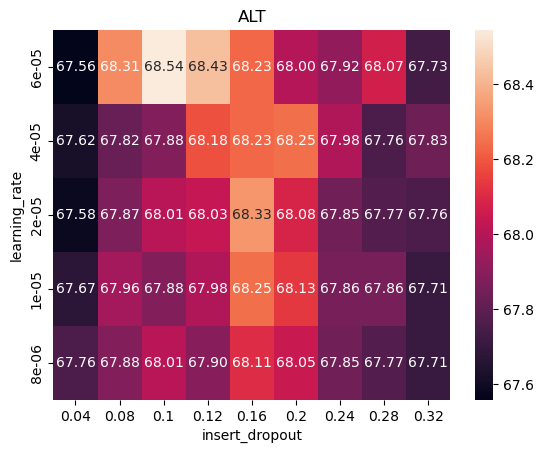

In [8]:
df_pivot = df.loc[ALT_MASK,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
ax = sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)
ax.set_title('ALT')

Text(0.5, 1.0, 'NEW_GRAD_INPUT')

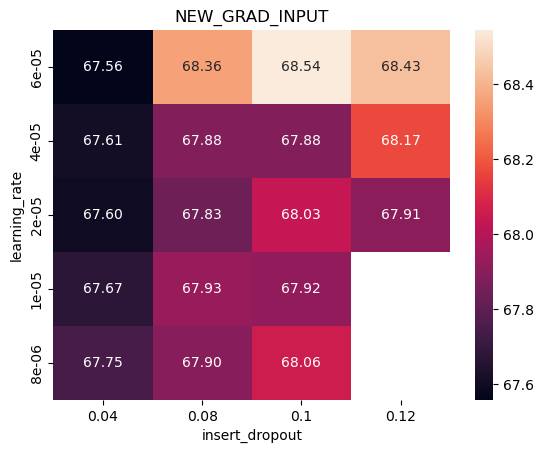

In [7]:
df_pivot = df.loc[INPUT_MASK,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
ax = sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)
ax.set_title('NEW_GRAD_INPUT')

Text(0.5, 1.0, 'NEW_GRAD_OUTPUT')

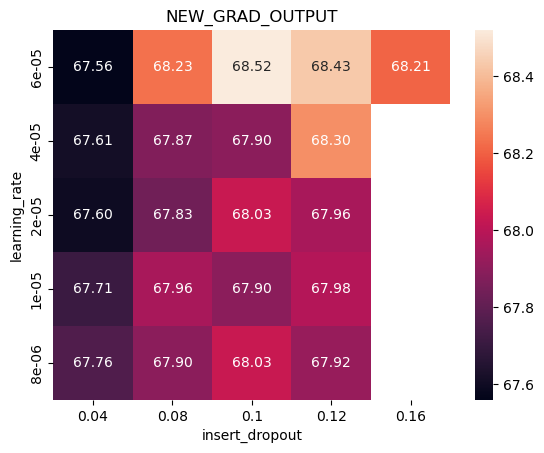

In [10]:
df_pivot = df.loc[OUTPUT_MASK,].pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
ax = sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)
ax.set_title('NEW_GRAD_OUTPUT')